<a href="https://colab.research.google.com/github/afrinaldipdg/Submission_Analisa_data_with_python/blob/main/Bike_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 658.1/658.1 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.2/306.2 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1

2025-01-30 09:51:31.944 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-30 09:51:32.050 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-30 09:51:32.346 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-01-30 09:51:32.352 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-30 09:51:32.354 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-30 09:51:32.360 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-30 09:51:32.365 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

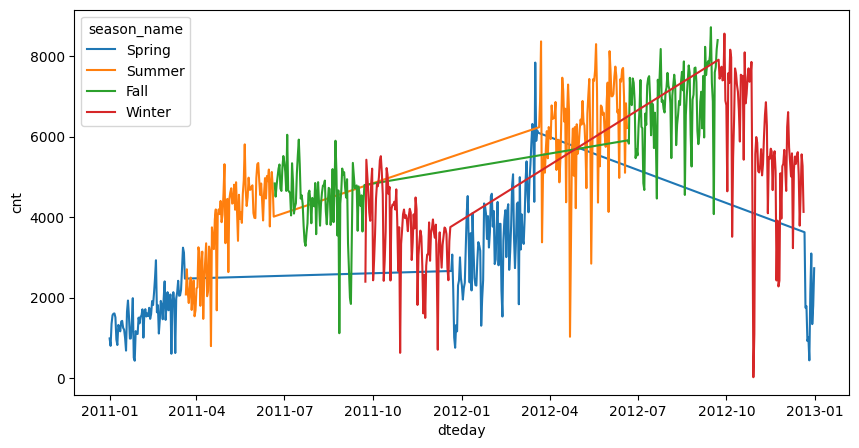

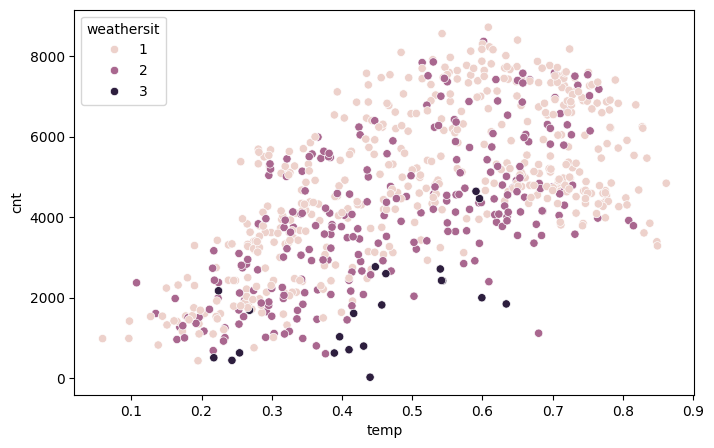

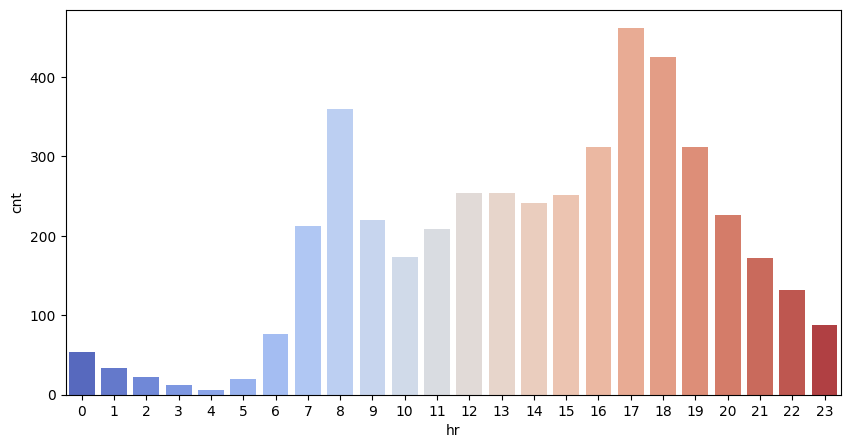

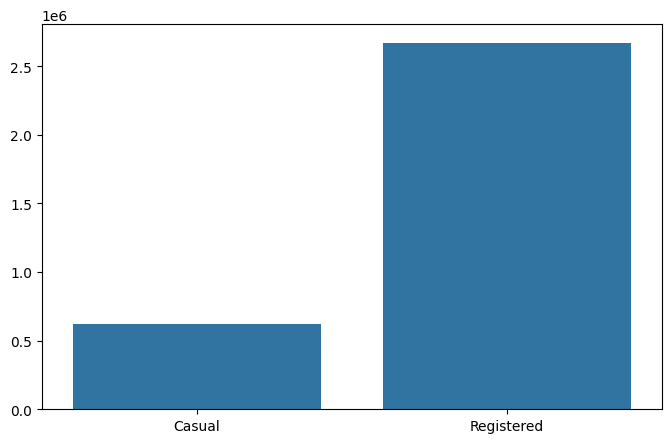

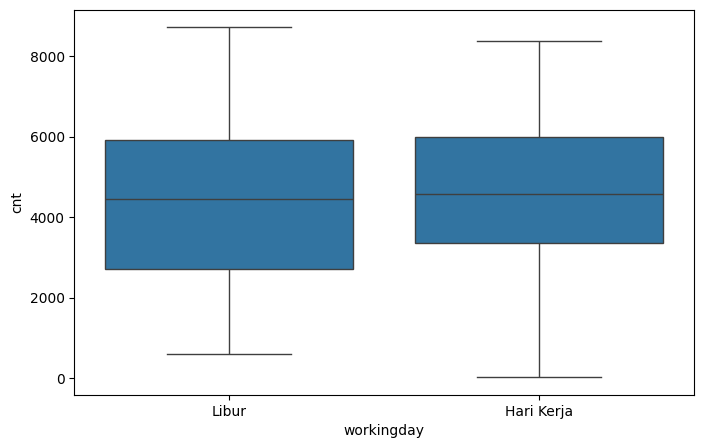

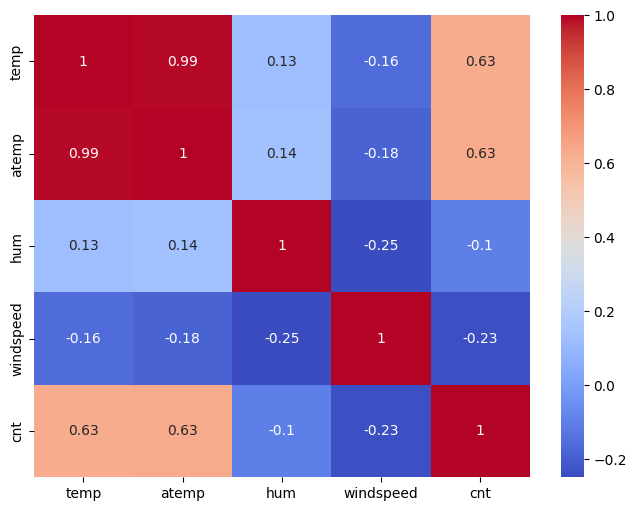

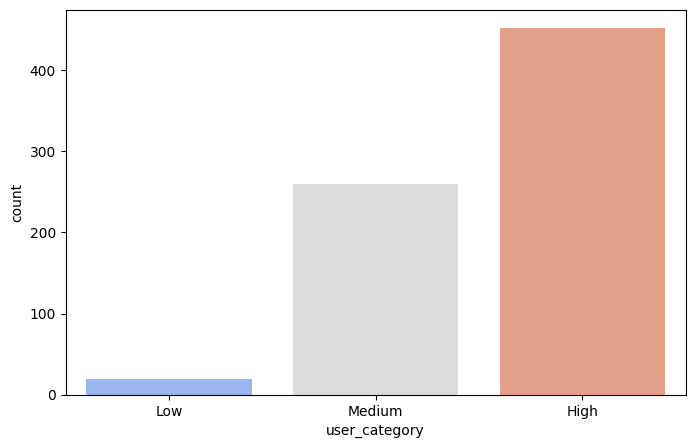

In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Konfigurasi dasar halaman Streamlit
st.set_page_config(page_title='Bike Sharing Dashboard', layout='wide')

# Load Data
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

# Konversi tanggal
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Mapping Musim
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_name'] = day_df['season'].map(season_map)
hour_df['season_name'] = hour_df['season'].map(season_map)

# Sidebar Navigation
st.sidebar.title("📊 Dashboard Navigasi")
page = st.sidebar.radio("Pilih Analisis:", [
    "Tampilkan Semua Analisis", "Overview Data", "Tren Penyewaan Sepeda per Musim",
    "Pengaruh Cuaca terhadap Penyewaan", "Waktu Tersibuk dan Paling Sepi",
    "Pengguna Casual vs Registered", "Penyewaan pada Hari Kerja vs Libur",
    "RFM Analysis", "Geospatial Analysis", "Analisis Korelasi", "Clustering tanpa ML"
])

def show_overview():
    st.title("📋 Overview Data Bike Sharing")
    st.write(day_df.head())

def show_tren_musim():
    st.title("📈 Tren Penyewaan Sepeda per Musim")
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.lineplot(x='dteday', y='cnt', hue='season_name', data=day_df, ax=ax)
    st.pyplot(fig)

def show_pengaruh_cuaca():
    st.title("🌦️ Pengaruh Cuaca terhadap Penyewaan")
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.scatterplot(x=day_df['temp'], y=day_df['cnt'], hue=day_df['weathersit'], ax=ax)
    st.pyplot(fig)

def show_waktu_tersibuk():
    st.title("⏰ Waktu Tersibuk dan Paling Sepi dalam Penyewaan Sepeda")
    hour_avg = hour_df.groupby("hr")["cnt"].mean().reset_index()
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(x='hr', y='cnt', data=hour_avg, ax=ax, palette='coolwarm')
    st.pyplot(fig)

def show_casual_vs_registered():
    st.title("👤 Perbandingan Pengguna Casual dan Registered")
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(x=['Casual', 'Registered'], y=[day_df['casual'].sum(), day_df['registered'].sum()], ax=ax)
    st.pyplot(fig)

def show_hari_kerja_vs_libur():
    st.title("🏢 Penyewaan pada Hari Kerja vs Hari Libur")
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.boxplot(x=day_df['workingday'], y=day_df['cnt'], ax=ax)
    ax.set_xticklabels(['Libur', 'Hari Kerja'])
    st.pyplot(fig)

def show_rfm():
    st.title("📊 RFM Analysis")
    rfm_df = day_df.groupby('dteday').agg({
        'dteday': lambda x: (day_df['dteday'].max() - x.max()).days,
        'cnt': ['count', 'sum']
    }).reset_index()
    rfm_df.columns = ['dteday', 'Recency', 'Frequency', 'Monetary']
    st.write(rfm_df.head())

def show_geospatial():
    st.title("🌍 Geospatial Analysis")
    st.warning("Data lokasi tidak tersedia.")

def show_korelasi():
    st.title("📊 Analisis Korelasi")
    features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
    correlation_matrix = day_df[features].corr()
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)
    st.pyplot(fig)

def show_clustering():
    st.title("🔍 Clustering tanpa Machine Learning")
    day_df['user_category'] = pd.cut(day_df['cnt'], bins=[0, 1000, 4000, 10000], labels=['Low', 'Medium', 'High'])
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.countplot(x=day_df['user_category'], palette='coolwarm', ax=ax)
    st.pyplot(fig)

if page == "Tampilkan Semua Analisis":
    show_overview()
    show_tren_musim()
    show_pengaruh_cuaca()
    show_waktu_tersibuk()
    show_casual_vs_registered()
    show_hari_kerja_vs_libur()
    show_rfm()
    show_geospatial()
    show_korelasi()
    show_clustering()
elif page == "Overview Data":
    show_overview()
elif page == "Tren Penyewaan Sepeda per Musim":
    show_tren_musim()
elif page == "Pengaruh Cuaca terhadap Penyewaan":
    show_pengaruh_cuaca()
elif page == "Waktu Tersibuk dan Paling Sepi":
    show_waktu_tersibuk()
elif page == "Pengguna Casual vs Registered":
    show_casual_vs_registered()
elif page == "Penyewaan pada Hari Kerja vs Libur":
    show_hari_kerja_vs_libur()
elif page == "RFM Analysis":
    show_rfm()
elif page == "Geospatial Analysis":
    show_geospatial()
elif page == "Analisis Korelasi":
    show_korelasi()
elif page == "Clustering tanpa ML":
    show_clustering()

st.sidebar.info("Dibuat oleh Afrinaldi 🚴‍♂️")